# Electric Vehicle Data
  
Objective:  To create a dataframe with "Region" and "Number of Vehicles"  
  
Workflow_1:  
1. From "vehicle_reg", extract "County" column.  
2. Use groupby and .agg, count, .sort_values() to create a new column in the dataframe which gives the # of EV registered in each county  
3. Upload "region" data.  Take only the "region" and "county".  Convert all the "county" values to uppercase.  
4. Merge "count_county" and "region". Output: a dataframe called "veh_count_reg" with "region" "county" and "number of vehicles" >>This method does not work, the table is riddled with NaN. **Question1: How might I be able to join this dataframe and get rid of NaN values?**
5. Create a new dataframe with "region" and "number of vehicles"
5. Use groupby and .agg, count, .sort_values() to create a new column in "veh_count_reg" which gives the # of EV registered in each region  

*Edit - I make some changes to this workflow as I work through the problem.*  
Workflow_2:  
  1. From "vehicle_reg", extract "County" column.   
  2. Upload "region" data.  Take only the "region" and "county".  Convert all the "county" values to uppercase.  
  3. Merge "County" and "region". Output: ideally, a dataframe called "count_reg" although at the moment, "Albany" occurs numerous times, but "Capital" occurs under region just once, and NaN occurs every time after that.  **Question 2: how do I return a region for every row that county appears?**
  4. Once I work out how to have a region for every county entry, I can do a groupby in a similar fashion to my method in Workflow_1, but this time with regions.  Output: # of vehicles and regions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(style="darkgrid")

In [2]:
#upload data
vehicle_reg = pd.read_csv('Vehicle__Snowmobile__and_Boat_Registrations.csv')
vehicle_reg[:5]

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,8995,PAS,BUFFALO,NY,14207,ERIE,1913,DE/EL,2DSD,ELECTRIC,1100,NaN,NaN,05/31/2018,07/01/2020,MR,N,N,N
1,VEH,607SR2131A,PAS,N SYRACUSE,NY,13212,ONONDAGA,1977,CITI,2DSD,ELECTRIC,2590,NaN,NaN,11/21/2017,11/20/2019,RD,N,N,N
2,VEH,537LS7D46CT083476,PAS,NEWFANE,NY,14108,NIAGARA,2012,AZURE,SUBN,ELECTRIC,4005,NaN,NaN,05/16/2017,05/17/2019,WH,N,N,N
3,VEH,53TBH2MC1BE900166,PAS,ROCKVILLE CTR,NY,11570,NASSAU,2011,THINK,2DSD,ELECTRIC,2348,NaN,NaN,04/18/2018,05/06/2020,RD,N,N,N
4,VEH,53G1B4A47DB000347,PAS,BROOKLYN,NY,11223,KINGS,2013,CODA,4DSD,ELECTRIC,3682,NaN,NaN,08/08/2018,08/07/2020,BK,N,N,N


In [3]:
#Create a new df with only the counties for each registration
county_registrations = vehicle_reg[['County']]
county_registrations[:5]
#rename so it is easier to join later
#county1.columns = ['County']
#county1[:5]

,County
0,ERIE
1,ONONDAGA
2,NIAGARA
3,NASSAU
4,KINGS


In [107]:
#use groupby to organize the counties, then count how many times a couny appears in df
#Add a column for the number of times a county shows up in the df. This is the number of EV registered in the county
county_registrations['Number of Vehicles'] = ''
reg_county = county_registrations.groupby(['County'], as_index = False)
count_county = reg_county.agg({'Number of Vehicles':'count'}).sort_values(['Number of Vehicles','County'], ascending=[False, True])
count_county

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,County,Number of Vehicles
59,WESTCHESTER,1577
28,NASSAU,1486
51,SUFFOLK,1196
29,NEW YORK,875
40,QUEENS,456
26,MONROE,423
23,KINGS,422
14,ERIE,283
43,ROCKLAND,251
0,ALBANY,226


In [109]:
count_county['County'] = count_county['County'].astype(str)
new_count_county = count_county
new_count_county

,County,Number of Vehicles
59,WESTCHESTER,1577
28,NASSAU,1486
51,SUFFOLK,1196
29,NEW YORK,875
40,QUEENS,456
26,MONROE,423
23,KINGS,422
14,ERIE,283
43,ROCKLAND,251
0,ALBANY,226


In [6]:
#import Region data
from pandas import DataFrame
region = pd.read_excel(r'/Users/ceciliapershyn/CIS_512_Term_Project/county_to_region.xlsx')
region = DataFrame(region, columns=['Region_Code','Region','County'])
region

,Region_Code,Region,County
0,1,Long Island,Nassau
1,1,Long Island,Suffolk
2,2,New York City,Kings
3,2,New York City,Bronx
4,2,New York City,New York
5,2,New York City,Queens
6,2,New York City,Richmond
7,3,Lower Hudson Valley,Dutchess
8,3,Lower Hudson Valley,Orange
9,3,Lower Hudson Valley,Putnam


In [79]:
#convert County column to uppercase so it will match the County columns in other tables after join
region['County'] = region['County'].str.upper()
region2 = region.rename(index=str, columns={"County": "county"})
region2[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,county,Region
0,NASSAU,Long Island
1,SUFFOLK,Long Island
2,KINGS,New York City
3,BRONX,New York City
4,NEW YORK,New York City


In [8]:
#remove Region_Code
region = region[['County','Region']]
region[:5]

,County,Region
0,NASSAU,Long Island
1,SUFFOLK,Long Island
2,KINGS,New York City
3,BRONX,New York City
4,NEW YORK,New York City


In [9]:
#1st attempt to join
veh_count_reg = pd.merge_ordered(count_county, region, on='County', fill_method=None, how='outer')
veh_count_reg

#Question1: How might I be able to join this dataframe and get rid of NaN values?

#Edit: further down in the notebook I realize that it would be
#a better strategy to add the county to the region table before
#doing the group by.  This way, I can groupby the region 
#and get the number of vehicles per region(see below for example)

,County,Number of Vehicles,Region
0,ALBANY,NaN,Capital Region
1,ALBANY,226.0,NaN
2,ALLEGANY,NaN,Western New York
3,ALLEGANY,2.0,NaN
4,BRONX,NaN,New York City
5,BRONX,77.0,NaN
6,BROOME,NaN,Central New York
7,BROOME,45.0,NaN
8,CATTARAUGUS,NaN,Western New York
9,CATTARAUGUS,7.0,NaN


In [10]:
#I'm creating a sample dataframe as an example of the output
#I am trying to achieve

sample = {'County':['Albany', 'Allegany', 'Columbia',  'Cattaragus', 'Clinton', 'Erie'], 
          '# of Veh':[226, 2, 31, 7, 21, 283], 
          'Region':['Capital', 'WNY', 'Capital', 'WNY', 'Eastern ADK', 'WNY' ]}
sample_veh_reg_count = DataFrame (sample, columns = ['County', '# of Veh', 'Region'])
sample_veh_reg_count

,County,# of Veh,Region
0,Albany,226,Capital
1,Allegany,2,WNY
2,Columbia,31,Capital
3,Cattaragus,7,WNY
4,Clinton,21,Eastern ADK
5,Erie,283,WNY


In [11]:
#The next step is to add together all the vehicles in each region
sample_veh_reg = sample_veh_reg_count[['# of Veh', 'Region']]
sample_veh_reg

,# of Veh,Region
0,226,Capital
1,2,WNY
2,31,Capital
3,7,WNY
4,21,Eastern ADK
5,283,WNY


In [12]:
sample_veh_reg = sample_veh_reg.groupby(['Region'], as_index = False)
sample_total_veh_region = sample_veh_reg.agg({'# of Veh':'count'}).sort_values(['# of Veh','Region'], ascending=[False, True])
sample_total_veh_region[:5]

#So this is just showing the number of times the region shows 
#up in the dataframe, which is not what I am looking for


,Region,# of Veh
2,WNY,3
0,Capital,2
1,Eastern ADK,1


In [14]:
#Maybe I should try to add the county to the region table BEFORE
#doing the initial groupby (which produces the # of vehicles/county).
#This way, I can do the group by on regions instead of counties

veh_count_reg = pd.merge_ordered(county, region, on='County', fill_method=None, how='outer')
veh_count_reg

#The result is the region only shows up one time,
#the first time the county shows up in the dataframe
#How do i get it to match so that every time Albany appears in the
#dataframe, it is matched with "Capital Region"?

NameError: name 'county' is not defined

In [15]:
#This is another sample dataset to show my new desired outcome

sample2 = {'County':['Albany', 'Albany', 'Albany',  'Cattaragus', 'Erie', 'Clinton', 'Dutchess', 'Dutchess'], 
          'Region':['Capital', 'Capital', 'Capital', 'WNY', 'WNY', 'Eastern ADK', 'LHV', 'LHV'  ]}
sample_county_reg = DataFrame (sample2, columns = ['County', 'Region'])
sample_county_reg

,County,Region
0,Albany,Capital
1,Albany,Capital
2,Albany,Capital
3,Cattaragus,WNY
4,Erie,WNY
5,Clinton,Eastern ADK
6,Dutchess,LHV
7,Dutchess,LHV


In [16]:
reg = sample_county_reg[['Region']]
reg['# of Veh'] = ''

sample_county_reg = reg.groupby(['Region'], as_index = False)
sample_total_county_reg = sample_county_reg.agg({'# of Veh':'count'}).sort_values(['# of Veh','Region'], ascending=[False, True])
sample_total_county_reg

#The below table is my desired outcome for this portion of the project

,Region,# of Veh
0,Capital,3
2,LHV,2
3,WNY,2
1,Eastern ADK,1


In [17]:
#The above method would work, if I could figure out a way to give
#each county its corresponding region in the data table above
#I am thinking a iterative loop might be the best option?

In [103]:
#Question3: Any ideas why this code would turn up an empty dataframe?
v_c_reg = count_county.merge(region2, how='inner', left_on='County', right_on='county', validate='one_to_many')
v_c_reg

,County,Number of Vehicles,county,Region


### Repeat the above process for gas vehicles per county

In [19]:
all_reg = pd.read_csv('All_Vehicle_Registration_NYS.csv')
all_reg[:5]

,Record Type,Fuel Type,County,Registration Class
0,BOAT,OTHER,CLINTON,12
1,VEH,DIESEL,NEW YORK,6862
2,BOAT,FLEX,ONONDAGA,10
3,BOAT,FLEX,SCHUYLER,2
4,BOAT,FLEX,LIVINGSTON,3


In [20]:
#WHY IS THIS FILTER NOT WORKING?!?!?
car_reg = all_reg[all_reg['Record Type'] == 'VEH']
car_reg[:5]

,Record Type,Fuel Type,County,Registration Class


# Charging Hubs



In [21]:
charge_hub = pd.read_csv('Electric_Vehicle_Charging_Stations_in_New_York.csv')
charge_hub.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Location
0,ELEC,Hudson Valley Community College - TEC-SMART Bu...,345 Hermes Rd,NaN,Malta,NY,12020,NaN,518-629-7075,E,...,42.971670,-73.774182,06/02/2017,36532,2018-02-06 21:00:03 UTC,SG,NaN,NaN,10/15/2010,"(42.97167, -73.774182)"
1,ELEC,EDISONPARKFAST,451 9th Ave,LOC #250 #2 LOT#250; ChargePoint America Program,New York,NY,10018,NaN,888-758-4389,E,...,40.754512,-73.995938,10/28/2018,36945,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.754512, -73.995938)"
2,ELEC,CARCHARGING,350 W 50th St,ICON MERCURY; Icon parking see attendant for a...,New York,NY,10019,NaN,888-758-4389,E,...,40.763245,-73.988648,10/28/2018,37169,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.7632446, -73.9886475)"
3,ELEC,CARCHARGING,310 W 39th St,ICON 310 W 39TH; Icon Parking systems see vale...,New York,NY,10018,NaN,888-758-4389,E,...,40.755440,-73.992027,10/28/2018,38530,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.7554398, -73.9920273)"
4,ELEC,EDISONPARKFAST,50 W 44th St,LOC #100 LEVEL3; Located in basement level of ...,New York,NY,10036,NaN,888-758-4389,E,...,40.755546,-73.982307,10/28/2018,38981,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.755546, -73.982307)"


In [22]:
Zip = charge_hub[['ZIP', 'Latitude', 'Longitude']]
Zip[:4]

,ZIP,Latitude,Longitude
0,12020,42.971670,-73.774182
1,10018,40.754512,-73.995938
2,10019,40.763245,-73.988648
3,10018,40.755440,-73.992027


In [23]:
#upload zip/county cross reference data from NYS open data

upload = pd.read_csv('zip_county_cross_reference.csv')
upload['County Name'] = upload['County Name'].str.upper()

upload[:5]

,County Name,State FIPS,County Code,County FIPS,ZIP Code,File Date
0,ALBANY,36,1,36001,12046,07/25/2007
1,ALBANY,36,1,36001,12083,07/25/2007
2,ALBANY,36,1,36001,12085,07/25/2007
3,ALBANY,36,1,36001,12201,07/25/2007
4,ALBANY,36,1,36001,12203,07/25/2007


In [24]:
zip_county = upload[['County Name', 'ZIP Code']]
zip_county[:5]

,County Name,ZIP Code
0,ALBANY,12046
1,ALBANY,12083
2,ALBANY,12085
3,ALBANY,12201
4,ALBANY,12203


In [25]:
#join zip_county and Zip.  Output will be a datatable that will
#give county values to the zip codes where charge hubs are located

zip_co = Zip.merge(zip_county, how='inner', left_on='ZIP', right_on='ZIP Code', validate='many_to_many')
zip_co

,ZIP,Latitude,Longitude,County Name,ZIP Code
0,12020,42.971670,-73.774182,SARATOGA,12020
1,10018,40.754512,-73.995938,NEW YORK,10018
2,10018,40.755440,-73.992027,NEW YORK,10018
3,10018,40.756029,-73.992655,NEW YORK,10018
4,10018,40.756177,-73.990558,NEW YORK,10018
5,10018,40.751427,-73.986598,NEW YORK,10018
6,10019,40.763245,-73.988648,NEW YORK,10019
7,10019,40.768784,-73.983147,NEW YORK,10019
8,10019,40.770790,-73.988508,NEW YORK,10019
9,10019,40.768257,-73.989087,NEW YORK,10019


In [26]:
county_hub = zip_co[['County Name']]
#county_hub['County Name'] = county_hub['County Name'].str.upper()
county_hub[:5]

,County Name
0,SARATOGA
1,NEW YORK
2,NEW YORK
3,NEW YORK
4,NEW YORK


In [27]:
hub_count = county_hub.merge(region, how='inner', left_on='County Name', right_on='County', validate='many_to_many')
hub_count

,County Name,County,Region
0,SARATOGA,SARATOGA,Eastern Adirondacks
1,SARATOGA,SARATOGA,Eastern Adirondacks
2,SARATOGA,SARATOGA,Eastern Adirondacks
3,SARATOGA,SARATOGA,Eastern Adirondacks
4,SARATOGA,SARATOGA,Eastern Adirondacks
5,SARATOGA,SARATOGA,Eastern Adirondacks
6,SARATOGA,SARATOGA,Eastern Adirondacks
7,SARATOGA,SARATOGA,Eastern Adirondacks
8,SARATOGA,SARATOGA,Eastern Adirondacks
9,SARATOGA,SARATOGA,Eastern Adirondacks


In [29]:
reg_count_hub1 = hub_count[['Region']]
reg_count_hub1[:5]

,Region
0,Eastern Adirondacks
1,Eastern Adirondacks
2,Eastern Adirondacks
3,Eastern Adirondacks
4,Eastern Adirondacks


In [30]:
reg_count_hub1['Number of Hubs'] = ''
reg_count_hub2 = reg_count_hub1.groupby(['Region'], as_index = False)
reg_count_hub = reg_count_hub2.agg({'Number of Hubs':'count'}).sort_values(['Number of Hubs','Region'], ascending=[False, True])
reg_count_hub

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Region,Number of Hubs
5,New York City,397
4,Lower Hudson Valley,161
0,Capital Region,127
3,Long Island,115
7,Western Finger Lakes,96
1,Central New York,84
2,Eastern Adirondacks,67
8,Western New York,62
6,Western Adirondacks,33


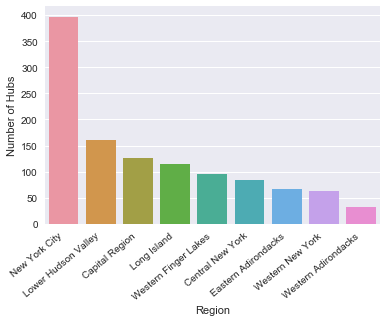

In [31]:
import seaborn as sns
ax = sns.barplot(x='Region', y='Number of Hubs', data=reg_count_hub)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')
plt.show()

In [32]:
#wondering if I can backtrack to the vehicle information and use the same 
#county_reg = county_hub.merge(region, how='inner', left_on='County Name', right_on='County', validate='many_to_many')
#code to merge county and region for the vehicle data?

In [78]:
#Question3: Any ideas why this code would turn up an empty dataframe?
v_c_reg = .merge(region, how='inner', left_on='County', right_on='County', validate='many_to_many')
v_c_reg

,County Name,County,Region_x,Region_y
0,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
1,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
2,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
3,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
4,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
5,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
6,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
7,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
8,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks
9,SARATOGA,SARATOGA,Eastern Adirondacks,Eastern Adirondacks


In [34]:
#group by: how many Hubs per county?
hcc = hub_count[['County', 'Region']]
hcc [:5]


hcc['Number of Hubs'] = ''
h_county = hcc.groupby(['Region', 'County'], as_index = False)
hub_county_count = h_county.agg({'Number of Hubs':'count'}).sort_values(['Number of Hubs','County'], ascending=[False, True])
#hub_county_count.groupby(['Region'], as_index = False)
hub_county_count[:5]

,Region,County,Number of Hubs
35,New York City,NEW YORK,306
25,Long Island,SUFFOLK,78
32,Lower Hudson Valley,WESTCHESTER,62
0,Capital Region,ALBANY,51
31,Lower Hudson Valley,ULSTER,44


In [35]:
import seaborn as sns
ax = sns.barplot(x = 'County',  
                   hue = 'Region',
                   palette = 'pastel',
                   data=hub_county_count)
ax.figure.set_size_inches(20,15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')
#ax.axes.set_title("Management of Tanzania Rural Water Sources",fontsize=18)
ax.set_xlabel("County",fontsize=14)
#ax.set_ylabel("Type of Management",fontsize=12)
ax.tick_params(labelsize=8)
ax_seg = plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Greenhouse Gas Emissions

In [36]:
e = pd.read_csv('Greenhouse_Gas_Emissions_From_Gasoline.csv')
e

,Year,Fuel Type,Transportation,Electricity Generation,Residential,Commercial,Industrial,Total CO2 Emissions,Percent of Total CO2 Emissions
0,2015,Gasoline,53.06,NaN,NaN,NaN,NaN,53.06,29.8
1,2014,Gasoline,53.58,NaN,NaN,NaN,NaN,53.58,29.8
2,2013,Gasoline,51.27,NaN,NaN,NaN,NaN,51.27,28.7
3,2012,Gasoline,48.72,NaN,NaN,NaN,NaN,48.72,28.6
4,2011,Gasoline,55.09,NaN,NaN,NaN,NaN,55.09,30.1
5,2010,Gasoline,55.43,NaN,NaN,NaN,NaN,55.43,29.0


In [37]:
emissions = e[['Year', 'Total CO2 Emissions', 'Percent of Total CO2 Emissions']]
emissions

,Year,Total CO2 Emissions,Percent of Total CO2 Emissions
0,2015,53.06,29.8
1,2014,53.58,29.8
2,2013,51.27,28.7
3,2012,48.72,28.6
4,2011,55.09,30.1
5,2010,55.43,29.0


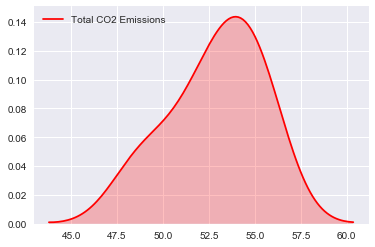

In [38]:
import seaborn as sns
p1=sns.kdeplot(emissions['Total CO2 Emissions'], shade=True, color='r')



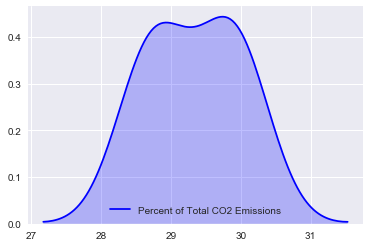

In [39]:
pl=sns.kdeplot(emissions['Percent of Total CO2 Emissions'], shade=True, color='b')

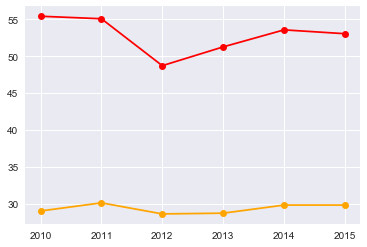

In [40]:
plt.plot('Year', 'Total CO2 Emissions', data=emissions, linestyle='-', marker='o', color='r')
plt.plot('Year', 'Percent of Total CO2 Emissions', data=emissions, linestyle='-', marker='o', color='orange')

# Charge Hubs per Sq Mile in Region (or county?)

In [41]:
#upload land area data from health.ny.gov/statistics

la = pd.read_csv('nys_population_density_2006.csv')
la[:5]


,County,2006 Population Estimate,2000 Census Population,2000 Land Area Square Miles,2006 Population Density1
0,Bronx,"1,361,473","1,332,650",42.03,32395.16
1,Kings,"2,508,820","2,465,326",70.61,35532.65
2,New York,"1,611,581","1,537,195",22.96,70179.35
3,Queens,"2,255,175","2,229,379",109.24,20645.13
4,Richmond,"477,377","443,728",58.48,8163.27


In [42]:
county_area = la[['County', '2000 Land Area Square Miles']]
county_area['County'] = county_area['County'].str.upper()
county_area = county_area.sort_values(['County'], ascending = True)

county_area = county_area.rename(index=str, columns={'2000 Land Area Square Miles':'Land Area (Sq Mi)'})

county_area

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,County,Land Area (Sq Mi)
5,ALBANY,523.45
6,ALLEGANY,1030.22
0,BRONX,42.03
7,BROOME,706.82
8,CATTARAUGUS,1309.85
9,CAYUGA,693.18
10,CHAUTAUQUA,1062.05
11,CHEMUNG,408.17
12,CHENANGO,894.36
13,CLINTON,1038.95


In [43]:
#merge county_area and region

county_area_region = county_area.merge(region, how='inner', left_on='County', right_on='County', validate='one_to_many')
county_area_region[:5]

,County,Land Area (Sq Mi),Region
0,ALBANY,523.45,Capital Region
1,ALLEGANY,1030.22,Western New York
2,BRONX,42.03,New York City
3,BROOME,706.82,Central New York
4,CATTARAUGUS,1309.85,Western New York


In [44]:
a = county_area_region.groupby(['Region', 'County'])[['Land Area (Sq Mi)']].sum()
a

Land Area (Sq Mi)
Region               County                        
Capital Region       ALBANY                  523.45
                     COLUMBIA                635.73
                     DELAWARE               1446.37
                     GREENE                  647.75
                     MONTGOMERY              404.82
                     OTSEGO                 1002.80
                     RENSSELAER              653.96
                     SCHENECTADY             206.10
                     SCHOHARIE               622.02
Central New York     BROOME                  706.82
                     CAYUGA                  693.18
                     CHENANGO                894.36
                     CORTLAND                499.65
                     MADISON                 655.86
                     ONONDAGA                780.29
                     OSWEGO                  953.30
                     TOMPKINS                476.05
Eastern Adirondacks  CLINTON                1038.95
                     ESSEX                  1796.80
                     FRANKLIN               1631.49
                     FULTON                  496.17
                     HAMILTON               1720.39
                     SARATOGA                811.84
                     WARREN                  869.29
                     WASHINGTON              835.44
Long Island          NASSAU                  286.69
                     SUFFOLK                 912.20
Lower Hudson Valley  DUTCHESS                801.59
                     ORANGE                  816.34
                     PUTNAM                  231.28
                     ROCKLAND                174.22
                     SULLIVAN                969.71
                     ULSTER                 1126.48
                     WESTCHESTER             432.82
New York City        BRONX                    42.03
                     KINGS                    70.61
                     NEW YORK                 22.96
                     QUEENS                  109.24
                     RICHMOND                 58.48
Western Adirondacks  HERKIMER               1411.25
                     JEFFERSON              1272.20
                     LEWIS                  1275.42
                     ONEIDA                 1212.70
Western Finger Lakes CHEMUNG                 408.17
                     GENESEE                 494.11
                     LIVINGSTON              632.13
                     MONROE                  659.29
                     ONTARIO                 644.38
                     ORLEANS                 391.40
                     SCHUYLER                328.71
                     SENECA                  324.91
                     STEUBEN                1392.64
                     WAYNE                   604.21
                     YATES                   338.24
Western New York     ALLEGANY               1030.22
                     CATTARAUGUS            1309.85
                     CHAUTAUQUA             1062.05
                     ERIE                   1044.21
                     NIAGARA                 522.95
                     WYOMING                 592.91

In [45]:
b = a.merge(hub_county_count, how='inner', left_on='County', right_on='County', validate='one_to_one')
b

,County,Land Area (Sq Mi),Region,Number of Hubs
0,ALBANY,523.45,Capital Region,51
1,COLUMBIA,635.73,Capital Region,12
2,DELAWARE,1446.37,Capital Region,8
3,GREENE,647.75,Capital Region,4
4,MONTGOMERY,404.82,Capital Region,7
5,OTSEGO,1002.80,Capital Region,8
6,RENSSELAER,653.96,Capital Region,13
7,SCHENECTADY,206.10,Capital Region,21
8,SCHOHARIE,622.02,Capital Region,3
9,BROOME,706.82,Central New York,9


In [46]:
c = b.groupby(['Region', 'County'])[['Land Area (Sq Mi)', 'Number of Hubs']].sum()
c[:5]

Land Area (Sq Mi)  Number of Hubs
Region         County                                       
Capital Region ALBANY                 523.45              51
               COLUMBIA               635.73              12
               DELAWARE              1446.37               8
               GREENE                 647.75               4
               MONTGOMERY             404.82               7

In [47]:
c['Hub Density per sq. mile'] = c['Number of Hubs'] / c['Land Area (Sq Mi)']
c
#it would be awesome if I can sort this table by hub density within each region

Land Area (Sq Mi)  Number of Hubs  \
Region               County                                           
Capital Region       ALBANY                  523.45              51   
                     COLUMBIA                635.73              12   
                     DELAWARE               1446.37               8   
                     GREENE                  647.75               4   
                     MONTGOMERY              404.82               7   
                     OTSEGO                 1002.80               8   
                     RENSSELAER              653.96              13   
                     SCHENECTADY             206.10              21   
                     SCHOHARIE               622.02               3   
Central New York     BROOME                  706.82               9   
                     CAYUGA                  693.18               8   
                     CORTLAND                499.65               2   
                     MADISON                 655.86               7   
                     ONONDAGA                780.29              35   
                     OSWEGO                  953.30               1   
                     TOMPKINS                476.05              22   
Eastern Adirondacks  CLINTON                1038.95               8   
                     ESSEX                  1796.80               6   
                     FRANKLIN               1631.49               3   
                     FULTON                  496.17               6   
                     HAMILTON               1720.39               1   
                     SARATOGA                811.84              26   
                     WARREN                  869.29              11   
                     WASHINGTON              835.44               6   
Long Island          NASSAU                  286.69              37   
                     SUFFOLK                 912.20              78   
Lower Hudson Valley  DUTCHESS                801.59              20   
                     ORANGE                  816.34              18   
                     PUTNAM                  231.28               2   
                     ROCKLAND                174.22               6   
                     SULLIVAN                969.71               9   
                     ULSTER                 1126.48              44   
                     WESTCHESTER             432.82              62   
New York City        BRONX                    42.03              11   
                     KINGS                    70.61              42   
                     NEW YORK                 22.96             306   
                     QUEENS                  109.24              34   
                     RICHMOND                 58.48               4   
Western Adirondacks  HERKIMER               1411.25               6   
                     JEFFERSON              1272.20               7   
                     ONEIDA                 1212.70              13   
Western Finger Lakes CHEMUNG                 408.17               2   
                     GENESEE                 494.11               3   
                     LIVINGSTON              632.13               4   
                     MONROE                  659.29              43   
                     ONTARIO                 644.38              11   
                     ORLEANS                 391.40               2   
                     SCHUYLER                328.71               7   
                     SENECA                  324.91               7   
                     STEUBEN                1392.64               2   
                     WAYNE                   604.21              11   
                     YATES                   338.24               4   
Western New York     CATTARAUGUS            1309.85               2   
                     CHAUTAUQUA             1062.05               6   
                     ERIE                   1044.21       

# Population Density and Income per County per Region

In [48]:
pop_dense = la[['County','2006 Population Density1']]
pop_dense[:5]

,County,2006 Population Density1
0,Bronx,32395.16
1,Kings,35532.65
2,New York,70179.35
3,Queens,20645.13
4,Richmond,8163.27


In [49]:
pop_dense ['County'] = pop_dense['County'].str.upper()
pop_dense = pop_dense.sort_values(['County'], ascending = True)

pop_dense = pop_dense.rename(index=str, columns={'2006 Population Density1':'Population Density'})

pop_dense[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,County,Population Density
5,ALBANY,568.46
6,ALLEGANY,48.79
0,BRONX,32395.16
7,BROOME,277.68
8,CATTARAUGUS,62.25


In [50]:
cpdr = c.merge(pop_dense, how='inner', left_on='County', right_on='County', validate = 'one_to_one')
cpdr

,County,Land Area (Sq Mi),Number of Hubs,Hub Density per sq. mile,Population Density
0,ALBANY,523.45,51,0.097431,568.46
1,COLUMBIA,635.73,12,0.018876,99.03
2,DELAWARE,1446.37,8,0.005531,32.48
3,GREENE,647.75,4,0.006175,76.92
4,MONTGOMERY,404.82,7,0.017292,121.32
5,OTSEGO,1002.80,8,0.007978,62.41
6,RENSSELAER,653.96,13,0.019879,237.46
7,SCHENECTADY,206.10,21,0.101892,729.93
8,SCHOHARIE,622.02,3,0.004823,51.76
9,BROOME,706.82,9,0.012733,277.68


In [51]:
# add income

income_tax_full = pd.read_csv('Income_Tax_NYS.csv')
income_tax_full[:5]

,Tax Year,Place of Residence,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2014,Queens,Total,NaN,"1,070,559","46,877,014.17","11,299,606.33","547,842.96","35,511,722.05","2,091,689.64","1,746,939.71",4,14
1,2014,Bronx,Total,NaN,"616,640","19,385,425.79","5,559,529.02","361,780.32","13,560,902.73","758,348.19","482,226.93",1,14
2,2014,Kings,Total,NaN,"1,138,249","56,877,626.01","11,787,784.05","608,940.23","45,595,461.37","2,848,028.68","2,338,423.78",2,14
3,2014,Manhattan,Total,NaN,"885,829","177,432,813.50","11,714,664.78","283,670.65","170,057,039.82","13,132,236.96","12,317,382.20",3,14
4,2014,Richmond,Total,NaN,"207,277","12,207,326.06","2,486,549.94","115,486.19","9,737,467.62","593,706.07","508,957.21",5,14


In [68]:
income_tax = income_tax_full[['Place of Residence', 'Taxable Income of All Returns (in thousands)']]
income_tax = income_tax.rename(index=str, columns={'Taxable Income of All Returns (in thousands)':'Total County Income (in thousands)'})
income_tax[:5]

,Place of Residence,Total County Income (in thousands)
0,Queens,"35,511,722.05"
1,Bronx,"13,560,902.73"
2,Kings,"45,595,461.37"
3,Manhattan,"170,057,039.82"
4,Richmond,"9,737,467.62"


In [69]:
place_of_res = income_tax[['Place of Residence']]
place_of_res['Place of Residence'] = place_of_res['Place of Residence'].str.upper()
place_of_res[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Place of Residence
0,QUEENS
1,BRONX
2,KINGS
3,MANHATTAN
4,RICHMOND


In [71]:
income_tax = income_tax['Total County Income (in thousands)'].str.replace(',', '')
income_tax[:5]


0     35511722.05
1     13560902.73
2     45595461.37
3    170057039.82
4      9737467.62
Name: Total County Income (in thousands), dtype: object

In [72]:
income_tax1 = income_tax.to_frame()
income_tax1[:5]

,Total County Income (in thousands)
0,35511722.05
1,13560902.73
2,45595461.37
3,170057039.82
4,9737467.62


In [73]:
income_tax1['Total County Income (in thousands)'] = income_tax1['Total County Income (in thousands)'].astype(float)
income_tax1[:5]

,Total County Income (in thousands)
0,3.551172e+07
1,1.356090e+07
2,4.559546e+07
3,1.700570e+08
4,9.737468e+06


In [74]:
frames = [place_of_res, income_tax1]
income_tax2 = pd.concat(frames, axis=1, join='outer', sort=True)
income_tax2[:5]

,Place of Residence,Total County Income (in thousands)
0,QUEENS,35511722.05
1,BRONX,13560902.73
10,CHAUTAUQUA,1626573.57
11,CHEMUNG,1327083.37
12,CHENANGO,623704.01


In [75]:
pop = la[['2006 Population Estimate', 'County']]
pop ['County'] = pop['County'].str.upper()
pop = pop.sort_values(['County'], ascending = True)

pop = pop.rename(index=str, columns={'2006 Population Estimate':'County Population'})

pop[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,County Population,County
5,"297,556",ALBANY
6,"50,267",ALLEGANY
0,"1,361,473",BRONX
7,"196,269",BROOME
8,"81,534",CATTARAUGUS


In [76]:
income_pop = income_tax2.merge(pop, how='inner', left_on='Place of Residence', right_on='County', validate = 'one_to_one')
income_pop[:5]

,Place of Residence,Total County Income (in thousands),County Population,County
0,QUEENS,35511722.05,"2,255,175",QUEENS
1,BRONX,13560902.73,"1,361,473",BRONX
2,CHAUTAUQUA,1626573.57,"135,357",CHAUTAUQUA
3,CHEMUNG,1327083.37,"88,641",CHEMUNG
4,CHENANGO,623704.01,"51,787",CHENANGO


In [77]:
#restart and run all, this should work
income_pop['County Population'] = income_pop['County Population'].str.replace(',', '').astype(float)
income_pop[:5]

,Place of Residence,Total County Income (in thousands),County Population,County
0,QUEENS,35511722.05,2255175.0,QUEENS
1,BRONX,13560902.73,1361473.0,BRONX
2,CHAUTAUQUA,1626573.57,135357.0,CHAUTAUQUA
3,CHEMUNG,1327083.37,88641.0,CHEMUNG
4,CHENANGO,623704.01,51787.0,CHENANGO


In [90]:
compare_inc_dens1 = income_pop[['Total County Income (in thousands)', 'County']]
compare_inc_dens2 = cpdr[['Hub Density per sq. mile', 'Number of Hubs', 'County']]
compare_inc_dens = compare_inc_dens1.merge(compare_inc_dens2, how='inner', left_on='County', right_on='County', validate='one_to_one')
compare_inc_dens[:5]

,Total County Income (in thousands),County,Hub Density per sq. mile,Number of Hubs
0,35511722.05,QUEENS,0.311241,34
1,13560902.73,BRONX,0.261718,11
2,1626573.57,CHAUTAUQUA,0.005649,6
3,1327083.37,CHEMUNG,0.004900,2
4,1129623.76,CLINTON,0.007700,8


In [91]:
compare_inc_dens_region = compare_inc_dens.merge(region, how='inner', left_on='County', right_on='County', validate='one_to_many')
compare_inc_dens_region[:5]

,Total County Income (in thousands),County,Hub Density per sq. mile,Number of Hubs,Region
0,35511722.05,QUEENS,0.311241,34,New York City
1,13560902.73,BRONX,0.261718,11,New York City
2,1626573.57,CHAUTAUQUA,0.005649,6,Western New York
3,1327083.37,CHEMUNG,0.004900,2,Western Finger Lakes
4,1129623.76,CLINTON,0.007700,8,Eastern Adirondacks


In [93]:
region_group_compare = compare_inc_dens_region.groupby(['Region', 'County'])[['Total County Income (in thousands)', 'Hub Density per sq. mile', 'Number of Hubs']].sum()
region_group_compare

Total County Income (in thousands)  \
Region               County                                            
Capital Region       ALBANY                               6862295.14   
                     COLUMBIA                             1331342.11   
                     DELAWARE                              544715.71   
                     GREENE                                739926.65   
                     MONTGOMERY                            634177.29   
                     OTSEGO                                852280.58   
                     RENSSELAER                           2911592.07   
                     SCHENECTADY                          2912105.97   
                     SCHOHARIE                             416246.92   
Central New York     BROOME                               3167903.50   
                     CAYUGA                               1181572.10   
                     CORTLAND                              639054.39   
                     MADISON                              1138739.06   
                     ONONDAGA                             9262802.32   
                     OSWEGO                               1617019.63   
                     TOMPKINS                             1818215.59   
Eastern Adirondacks  CLINTON                              1129623.76   
                     ESSEX                                 561697.63   
                     FRANKLIN                              554681.57   
                     FULTON                                690903.39   
                     HAMILTON                               72244.07   
                     SARATOGA                             5736770.80   
                     WARREN                               1268567.53   
                     WASHINGTON                            822382.01   
Long Island          NASSAU                              58230874.85   
                     SUFFOLK                             46178095.77   
Lower Hudson Valley  DUTCHESS                             6886594.03   
                     ORANGE                               7851499.17   
                     PUTNAM                               3158691.19   
                     ROCKLAND                             8778851.81   
                     SULLIVAN                             1036463.25   
                     ULSTER                               3279477.45   
                     WESTCHESTER                         60099839.27   
New York City        BRONX                               13560902.73   
                     KINGS                               45595461.37   
                     QUEENS                              35511722.05   
                     RICHMOND                             9737467.62   
Western Adirondacks  HERKIMER                              785640.01   
                     JEFFERSON                            1258617.45   
                     ONEIDA                               3291306.95   
Western Finger Lakes CHEMUNG                              1327083.37   
                     GENESEE                               884622.87   
                     LIVINGSTON                            931721.44   
                     MONROE                              14897237.51   
                     ONTARIO                              2261929.37   
                     ORLEANS                               484908.32   
                     SCHUYLER                              249678.56   
                     SENECA                                447974.79   
                     STEUBEN                              1496164.68   
                     WAYNE                                1398500.00   
                     YATES                                 311852.60   
Western New York     CATTARAUGUS                           948336.69   
                     CHAUTAUQUA                           1626573.57   
                     ERIE                                17679696.17   
  

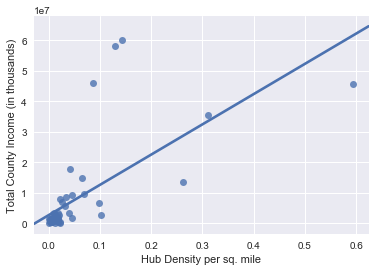

In [88]:
sns.regplot(x='Hub Density per sq. mile', y='Total County Income (in thousands)', data=region_group_compare, ci=None)

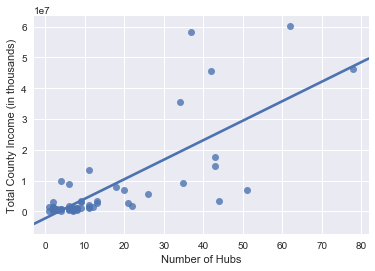

In [94]:
sns.regplot(x='Number of Hubs', y='Total County Income (in thousands)', data=region_group_compare, ci=None)

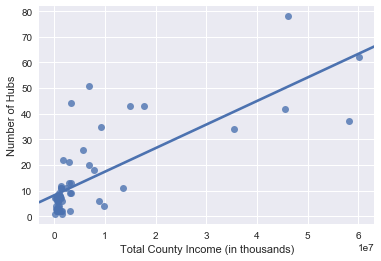

In [95]:
sns.regplot(y='Number of Hubs', x='Total County Income (in thousands)', data=region_group_compare, ci=None)

In [96]:
#might want to bring in more hubs for the richer counties, if there are more cars in richer counties

In [111]:
compare_inc_cars1 = income_pop[['Total County Income (in thousands)', 'County']]
compare_inc_cars = compare_inc_cars1.merge(new_count_county, how='inner', left_on='County', right_on='County', validate='one_to_one')
compare_inc_cars[:5]

,Total County Income (in thousands),County,Number of Vehicles


In [112]:
registration_total = pd.read_csv('Vehicle__Snowmobile__and_Boat_Registrations.csv')

In [113]:
county_registration = registration_total[['County']]
county_registration[:5]

,County
0,ERIE
1,ONONDAGA
2,NIAGARA
3,NASSAU
4,KINGS


In [116]:
county_registration['# of Veh'] = ''
no_veh_county = county_registration.groupby(['County']).agg({'# of Veh':'count'})
no_veh_county[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,# of Veh
County,
ALBANY,226
ALLEGANY,2
BRONX,77
BROOME,45
CATTARAUGUS,7


In [117]:
compare_inc_cars1 = income_pop[['Total County Income (in thousands)', 'County']]
compare_inc_cars = no_veh_county.merge(compare_inc_cars1, how='inner', left_on='County', right_on='County', validate = 'one_to_one')
compare_inc_cars[:5]

,County,# of Veh,Total County Income (in thousands)
